# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


In [4]:
cities

['vaini',
 'rikitea',
 'haines junction',
 'ushuaia',
 'punta arenas',
 'bluff',
 'bethel',
 'butaritari',
 'thompson',
 'atuona',
 'busselton',
 'majene',
 'san juan',
 'hobart',
 'remeti',
 'saint-leu',
 'ereymentau',
 'akdepe',
 'trapani',
 'saldanha',
 'kavaratti',
 'carnarvon',
 'wau',
 'katsuura',
 'khorixas',
 'barrow',
 'new norfolk',
 'beni mazar',
 'komsomolskiy',
 'rungata',
 'palasa',
 'san vicente',
 'hambantota',
 'mahebourg',
 'port alfred',
 'saint-joseph',
 'aklavik',
 'gat',
 'chikola',
 'griffith',
 'saint george',
 'bullhead city',
 'saleaula',
 'hermanus',
 'khatanga',
 'chuy',
 'mount gambier',
 'provideniya',
 'tiksi',
 'bredasdorp',
 'mys shmidta',
 'hilo',
 'guarenas',
 'goderich',
 'east london',
 'kloulklubed',
 'belushya guba',
 'klaksvik',
 'cape town',
 'gimli',
 'taolanaro',
 'nuuk',
 'puri',
 'kurilsk',
 'bengkulu',
 'itarema',
 'biak',
 'bonfim',
 'vila velha',
 'aswan',
 'buchanan',
 'santa cruz',
 'sriperumbudur',
 'hithadhoo',
 'longyearbyen',
 'kapa

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
url="https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url=url+"&q="+ "oxford"
print(city_url)
weather=requests.get(city_url).json()
weather

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=oxford


{'coord': {'lon': -1.256, 'lat': 51.7522},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 39.81,
  'feels_like': 33.26,
  'temp_min': 38.77,
  'temp_max': 41.76,
  'pressure': 1018,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 50},
 'clouds': {'all': 100},
 'dt': 1670171364,
 'sys': {'type': 2,
  'id': 2045906,
  'country': 'GB',
  'sunrise': 1670140413,
  'sunset': 1670169430},
 'timezone': 0,
 'id': 2640729,
 'name': 'Oxford',
 'cod': 200}

In [6]:
lon=weather['coord']['lon']
description=weather['weather'][0]['description']
description

'fog'

In [21]:
url="https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url=url+"&q="+ cities[4]
print(city_url)
weather=requests.get(city_url).json()
weather

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=xambioa


{'coord': {'lon': -48.5364, 'lat': -6.4111},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 80.51,
  'feels_like': 85.84,
  'temp_min': 80.51,
  'temp_max': 80.51,
  'pressure': 1007,
  'humidity': 83,
  'sea_level': 1007,
  'grnd_level': 992},
 'visibility': 5569,
 'wind': {'speed': 4.7, 'deg': 121, 'gust': 7.02},
 'clouds': {'all': 96},
 'dt': 1670171494,
 'sys': {'country': 'BR', 'sunrise': 1670143822, 'sunset': 1670188721},
 'timezone': -10800,
 'id': 3384940,
 'name': 'Xambioá',
 'cod': 200}

In [22]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units ="Imperial"

# Define an empty list to fetch the weather data for each city
city_data = []



# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    print('key', weather_api_key)
    print('url', url)
    print('units',units)
    city_url = f"{url}units={units}&APPID={weather_api_key}&q="
    print('city_url', city_url)
    
   
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        print(city_url+city)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather ['clouds'] ['all']
        city_wind = city_weather ['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        import traceback
        traceback.print_exc()
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 1 of Set 1 | bone
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=bone
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 2 of Set 1 | ushuaia
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=ushuaia
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=charters towers
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 17 of Set 1 | alyangula
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=alyangula
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 18 of Set 1 | tasiilaq
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=tasiilaq
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openwe

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=mataura
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 21 of Set 1 | tuktoyaktuk
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=tuktoyaktuk
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 22 of Set 1 | ambon
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=ambon
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.o

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=busselton
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 33 of Set 1 | hithadhoo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=hithadhoo
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 34 of Set 1 | evensk
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=evensk
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.o

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=constantine
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 37 of Set 1 | bredasdorp
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=bredasdorp
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 38 of Set 1 | anadyr
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=anadyr
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweatherm

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=san cristobal
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 42 of Set 1 | vaini
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=vaini
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 43 of Set 1 | port alfred
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=port alfred
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathe

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=capao bonito
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 49 of Set 1 | arraial do cabo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=arraial do cabo
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 50 of Set 1 | atuona
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=atuona
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.o

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=port-cartier
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 8 of Set 2 | kirn
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=kirn
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 9 of Set 2 | buraydah
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=buraydah
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/da

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=carnarvon
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 30 of Set 2 | sajanan
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=sajanan
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 31 of Set 2 | villamontes
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=villamontes
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathe

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=chicama
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 38 of Set 2 | vestmannaeyjar
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=vestmannaeyjar
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 39 of Set 2 | constitucion
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=constitucion
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=abu dhabi
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 46 of Set 2 | cherskiy
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=cherskiy
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 47 of Set 2 | qui nhon
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=qui nhon
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=namibe
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 3 of Set 3 | porto nacional
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=porto nacional
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 4 of Set 3 | bethel
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=bethel
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweather

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=hovd
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 18 of Set 3 | khatanga
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=khatanga
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 19 of Set 3 | kemijarvi
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=kemijarvi
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.or

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=longyearbyen
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 25 of Set 3 | miri
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=miri
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 26 of Set 3 | yeppoon
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=yeppoon
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/da

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=pacific grove
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 45 of Set 3 | kiunga
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=kiunga
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 46 of Set 3 | esperance
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=esperance
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweatherm

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=pochutla
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 10 of Set 4 | sao felipe
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=sao felipe
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 11 of Set 4 | bengkulu
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=bengkulu
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweather

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'
Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=mys shmidta
City not found. Skipping...
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 22 of Set 4 | seymchan
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=seymchan
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 23 of Set 4 | roseburg
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=roseburg
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=laguna
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 33 of Set 4 | krasnoarmeysk
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=krasnoarmeysk
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 34 of Set 4 | mar del plata
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=mar del plata
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://a

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=safranbolu
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 42 of Set 4 | adrasmon
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=adrasmon
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 43 of Set 4 | camacha
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=camacha
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=te anau
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 9 of Set 5 | tiksi
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=tiksi
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 10 of Set 5 | sao jose da coroa grande
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=sao jose da coroa grande
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url htt

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=santa lucia
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 13 of Set 5 | prince rupert
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=prince rupert
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 14 of Set 5 | samarai
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=samarai
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.open

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=general elizardo aquino
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 21 of Set 5 | cidreira
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=cidreira
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 22 of Set 5 | roald
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=roald
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openwe

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=tiznit
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 44 of Set 5 | nueve de julio
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=nueve de julio
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 45 of Set 5 | ler
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=ler
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=jijiga
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 2 of Set 6 | waipawa
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=waipawa
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 3 of Set 6 | naruja
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=naruja
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=noumea
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 12 of Set 6 | umzimvubu
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=umzimvubu
City not found. Skipping...
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 13 of Set 6 | smithers


Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=smithers
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 14 of Set 6 | balikpapan
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=balikpapan
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 15 of Set 6 | saint-michel-des-saints
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=saint-michel-des-saints
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
ci

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=angoram
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 22 of Set 6 | dasoguz
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=dasoguz
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 23 of Set 6 | saint george
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=saint george
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathe

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=faanui
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 39 of Set 6 | bolshiye uki
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=bolshiye uki
City not found. Skipping...
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 40 of Set 6 | srednekolymsk


Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=srednekolymsk
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 41 of Set 6 | pulaski
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=pulaski
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 42 of Set 6 | trzebiatow
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=trzebiatow
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweat

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=korla
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 2 of Set 7 | chokurdakh
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=chokurdakh
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 3 of Set 7 | tingrela
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=tingrela
City not found. Skipping...
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url 

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=kankaanpaa
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 5 of Set 7 | tuatapere
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=tuatapere
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 6 of Set 7 | edd
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=edd
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=baie-comeau
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 14 of Set 7 | sitka
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=sitka
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 15 of Set 7 | sao joao da barra
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=sao joao da barra
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'
Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=dianopolis
City not found. Skipping...
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 23 of Set 7 | santiago del estero
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=santiago del estero
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 24 of Set 7 | caldwell
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=caldwell
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=vostok
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 34 of Set 7 | ancud
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=ancud
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 35 of Set 7 | werdau
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=werdau
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=okhotsk
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 6 of Set 8 | maltahohe
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=maltahohe
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 7 of Set 8 | san policarpo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=san policarpo
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openwe

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=port-gentil
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 28 of Set 8 | kutum
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=kutum
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 29 of Set 8 | surt
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=surt
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.

Traceback (most recent call last):
  File "/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_26984/2902843548.py", line 48, in <cell line: 19>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=codrington
key 66d195228d7fe1561d75f50241726ea6
url https://api.openweathermap.org/data/2.5/weather?
units Imperial
city_url https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=
Processing Record 42 of Set 8 | kargasok


KeyboardInterrupt: 

In [31]:
print(weather_api_key)

66d195228d7fe1561d75f50241726ea6


In [32]:
print(city_url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66d195228d7fe1561d75f50241726ea6&q=


In [33]:
print(url)

https://api.openweathermap.org/data/2.5/weather?


In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          358
Lat           358
Lng           358
Max Temp      358
Humidity      358
Cloudiness    358
Wind Speed    358
Country       358
Date          358
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bone,51.9669,12.1396,34.90,89,100,9.40,DE,1670171499
1,ushuaia,-54.8000,-68.3000,55.06,44,40,13.80,AR,1670171499
2,okha,53.5739,142.9478,-2.70,92,60,23.31,RU,1670171500
3,dikson,73.5069,80.5464,30.49,93,100,22.03,RU,1670171500
4,xambioa,-6.4111,-48.5364,80.51,83,96,4.70,BR,1670171501


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bone,51.9669,12.1396,34.90,89,100,9.40,DE,1670171499
1,ushuaia,-54.8000,-68.3000,55.06,44,40,13.80,AR,1670171499
2,okha,53.5739,142.9478,-2.70,92,60,23.31,RU,1670171500
3,dikson,73.5069,80.5464,30.49,93,100,22.03,RU,1670171500
4,xambioa,-6.4111,-48.5364,80.51,83,96,4.70,BR,1670171501


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

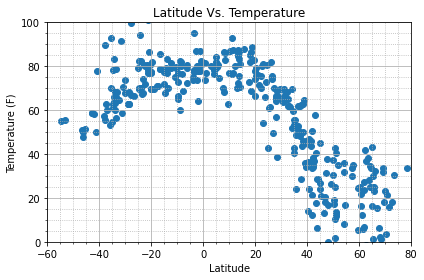

In [45]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values,y_values)
plt.title('Latitude Vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

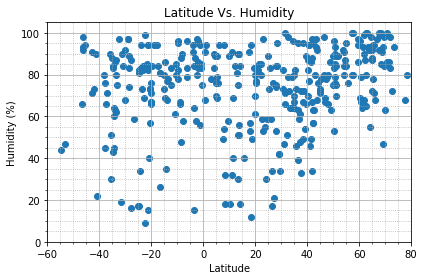

In [48]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Latitude Vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

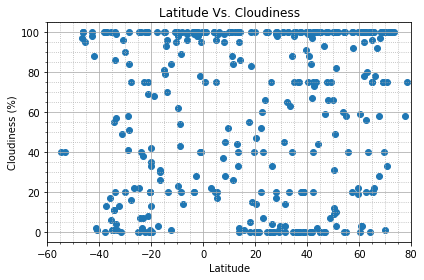

In [50]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values,y_values)
plt.title('Latitude Vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

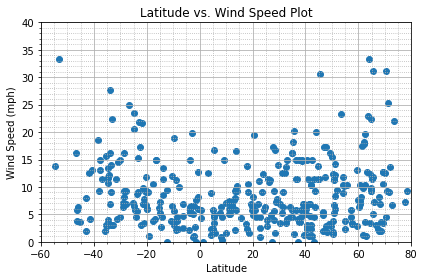

In [51]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Latitude vs. Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values, y_values)
    
    print(f"r-squared: {rvalue**2}")
    print(f"Correlation: {correlation}")
    print(f"Line: {line_eq}") 

    return regress_values, line_eq

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
mask = city_data_df['Lat'] >= 0
northern_hemisphere = city_data_df[mask]


# Display sample data
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bone,51.9669,12.1396,34.90,89,100,9.40,DE,1670171499
2,okha,53.5739,142.9478,-2.70,92,60,23.31,RU,1670171500
3,dikson,73.5069,80.5464,30.49,93,100,22.03,RU,1670171500
5,nanortalik,60.1432,-45.2371,24.84,69,0,6.40,GL,1670171501
6,nagua,19.3832,-69.8474,82.71,83,40,6.91,DO,1670171501


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
mask = city_data_df['Lat'] < 0

southern_hemisphere = city_data_df[mask]

# Display sample data
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,55.06,44,40,13.80,AR,1670171499
4,xambioa,-6.4111,-48.5364,80.51,83,96,4.70,BR,1670171501
8,punta arenas,-53.1500,-70.9167,55.51,47,40,33.38,CL,1670171502
10,hermanus,-34.4187,19.2345,65.80,64,11,12.19,ZA,1670171353
12,lebu,-37.6167,-73.6500,62.85,66,13,14.90,CL,1670171503


###  Temperature vs. Latitude Linear Regression Plot

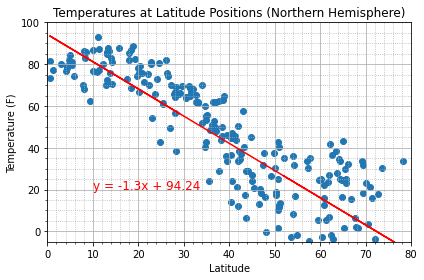

In [75]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()


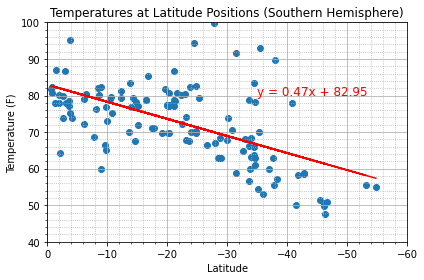

In [66]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("Images/sh_lat_temp_regression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE, Both the Northern Hemisphere and Southern Hemisphere show the same inverse relationship between Latitude and Temperature. As we get closer to the equator the temmperature is increasing.

### Humidity vs. Latitude Linear Regression Plot

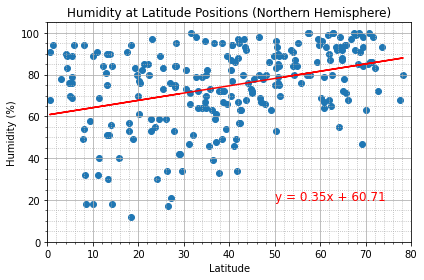

In [68]:
# Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("Images/nh_lat_humid_regression.png")

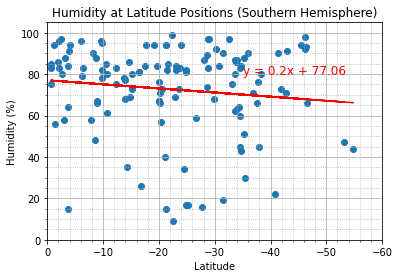

In [69]:
# Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
#plt.savefig("Images/sh_lat_humid_regression.png")

**Discussion about the linear relationship:** Response: There is no strong corelation between humidity and latitude. In Northern Hemisphere as we further move away from the equator, humidity increases. In Southern Hemisphere as we further move away from the equator, humidity decreases. 

### Cloudiness vs. Latitude Linear Regression Plot

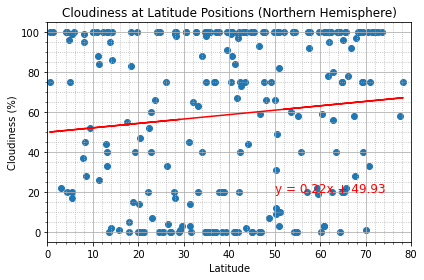

In [70]:
# Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("Images/nh_lat_clouds_regression.png")

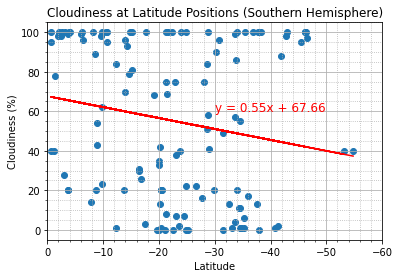

In [71]:
# Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
#plt.savefig("Images/sh_lat_clouds_regression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE: There is no significant corelation between the cloudiness and latitude from the plots. In Northern Hemisphere, looking at the linear regression performed there is a positive corelation. In the Southern Hemisphere, there is a strong negative corelation. Further you are from the equator the cloudiness is observed to be decreasing. 

### Wind Speed vs. Latitude Linear Regression Plot

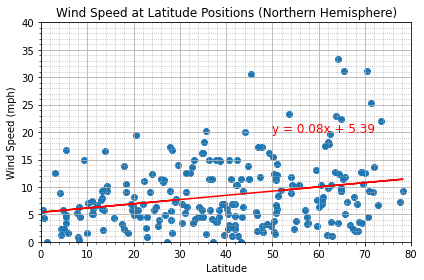

In [72]:
# Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("Images/nh_lat_wind_regression.png")

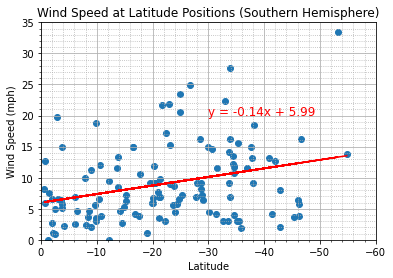

In [73]:
# Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
#plt.savefig("Images/sh_lat_wind_regression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE: There does see to be strong correlation between wind speed and latitude from the plots. Further you are from the equator, the wind speeds are higher for both hemispheres. 